# Laboratorio 1

In [215]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import cv2

## Ejercicio 2

### 2.1 Construcción de histogramas normalizados

In [55]:
vaso_claro_path = "vaso_claro.jpg"

In [56]:
vaso_oscuro_path = "vaso_oscuro.jpg"

In [57]:
def normalize_histogram(hist, num_pixels):
    return [h / num_pixels for h in hist]

In [58]:
def get_normalized_histograms_from_image(image_path):
    if type(image_path) == str:
        image = Image.open(image_path)
    else:
        image = image_path
    
    hist_r = image.getchannel('R').histogram()
    hist_g = image.getchannel('G').histogram()
    hist_b = image.getchannel('B').histogram()

    num_pixels = sum(hist_r) 
    hist_r_normalized = normalize_histogram(hist_r, num_pixels)
    hist_g_normalized = normalize_histogram(hist_g, num_pixels)
    hist_b_normalized = normalize_histogram(hist_b, num_pixels)
    
    
    hist_r_normalized_np = np.array(hist_r_normalized)
    hist_g_normalized_np = np.array(hist_g_normalized)
    hist_b_normalized_np = np.array(hist_b_normalized)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    # Usar 'bar' para el histograma del canal rojo
    axs[0].bar(range(256), hist_r_normalized, color='red')
    axs[0].set_title('Histograma Normalizado del Canal Rojo')
    axs[0].set_xlabel('Intensidad del píxel')
    axs[0].set_ylabel('Frecuencia normalizada')

    # Usar 'bar' para el histograma del canal verde
    axs[1].bar(range(256), hist_g_normalized, color='green')
    axs[1].set_title('Histograma Normalizado del Canal Verde')
    axs[1].set_xlabel('Intensidad del píxel')
    axs[1].set_ylabel('Frecuencia normalizada')

    # Usar 'bar' para el histograma del canal azul
    axs[2].bar(range(256), hist_b_normalized, color='blue')
    axs[2].set_title('Histograma Normalizado del Canal Azul')
    axs[2].set_xlabel('Intensidad del píxel')
    axs[2].set_ylabel('Frecuencia normalizada')

    plt.tight_layout()
    plt.show()
    
    return hist_r_normalized_np, hist_g_normalized_np, hist_b_normalized_np

#### Imagen Clara

![Claro vaso](vaso_claro.jpg)

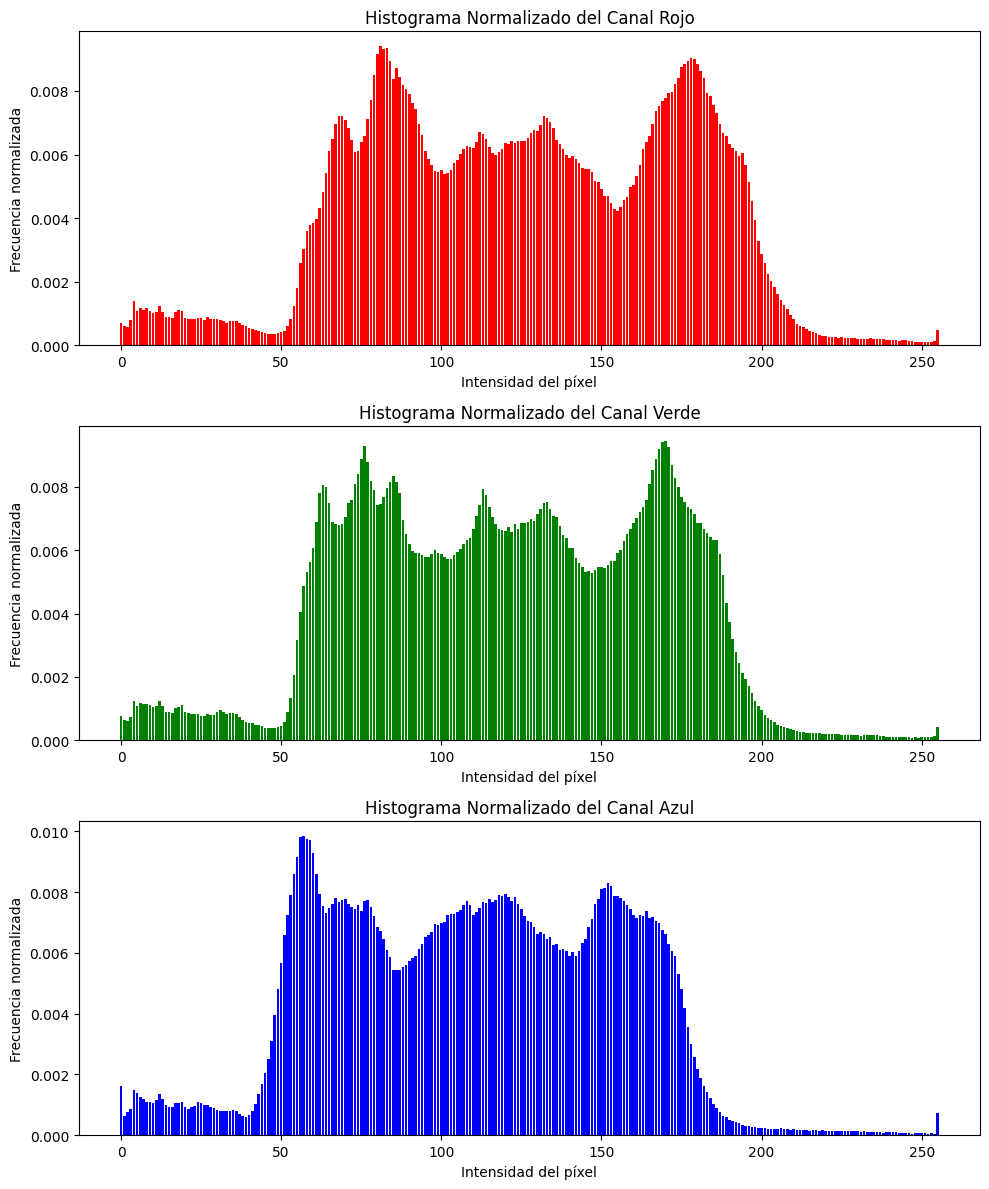

In [59]:
claro_hist_r_normalized_np, claro_hist_g_normalized_np, claro_hist_b_normalized_np = get_normalized_histograms_from_image(vaso_claro_path)

#### Imagen Obscura

![Oscuro](vaso_oscuro.jpg)

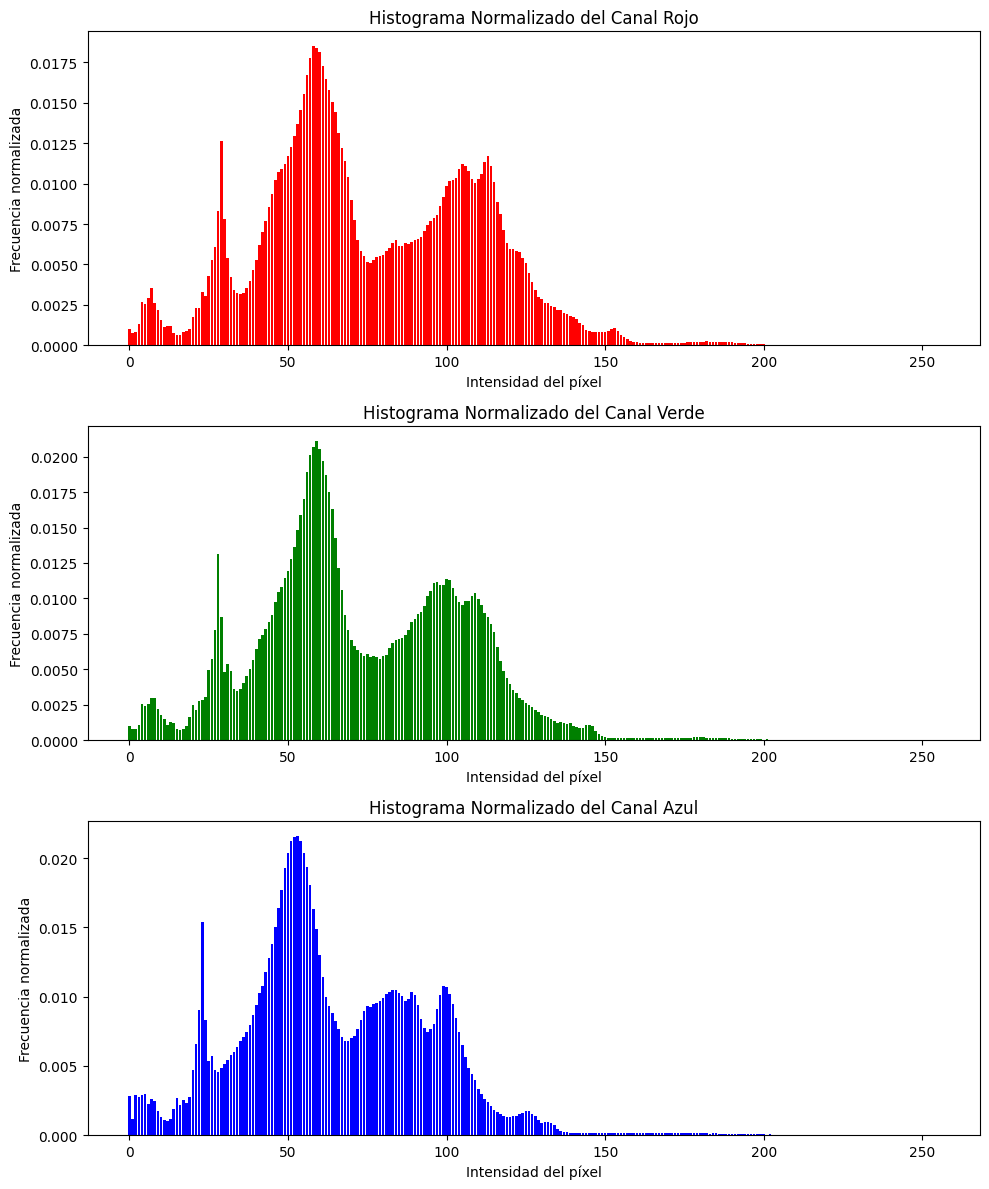

In [60]:
obscuro_hist_r_normalized_np, obscuro_hist_g_normalized_np, obscuro_hist_b_normalized_np = get_normalized_histograms_from_image(vaso_oscuro_path)

En los histogramas que encontramos arriba, podemos ver la comparación entre una imagen clara y una oscura. En la imagen clara, podemos ver que la mayoría de los pixeles se encuentran entre 50 y 200 mientras que en la imagen oscura, la mayoría de los pixeles se encuentran entre 0 y 100. El análisis de los histogramas nos proporciona una comprensión visual de la distribución de intensidades en una imagen, lo que puede ser útil para tomar decisiones informadas sobre ajustes de contraste, correcciones gamma u otras técnicas de procesamiento de imágenes que busquen mejorar la calidad visual de la imagen.

### 2.2 Distancia que compare dos histogramas

Como grupo decidimos utilizar como distancia la distancia euclidiana entre los histogramas normalizados por cada color y luego encontrar el promedio de las distancias entre los tres colores.


In [61]:
def EuclideanDistance(array1, array2):
    return np.linalg.norm(array1 - array2)


### 2.3 Comparar distancias


In [62]:
red_distance_vasos = EuclideanDistance(claro_hist_r_normalized_np, obscuro_hist_r_normalized_np)
green_distance_vasos = EuclideanDistance(claro_hist_g_normalized_np, obscuro_hist_g_normalized_np)
blue_distance_vasos = EuclideanDistance(claro_hist_b_normalized_np, obscuro_hist_b_normalized_np)

mean_distance_vasos = (red_distance_vasos + green_distance_vasos + blue_distance_vasos) / 3

print("Distancia Euclidiana entre las imágenes del vaso: ", mean_distance_vasos)

Distancia Euclidiana entre las imágenes del vaso:  0.08309024608825726


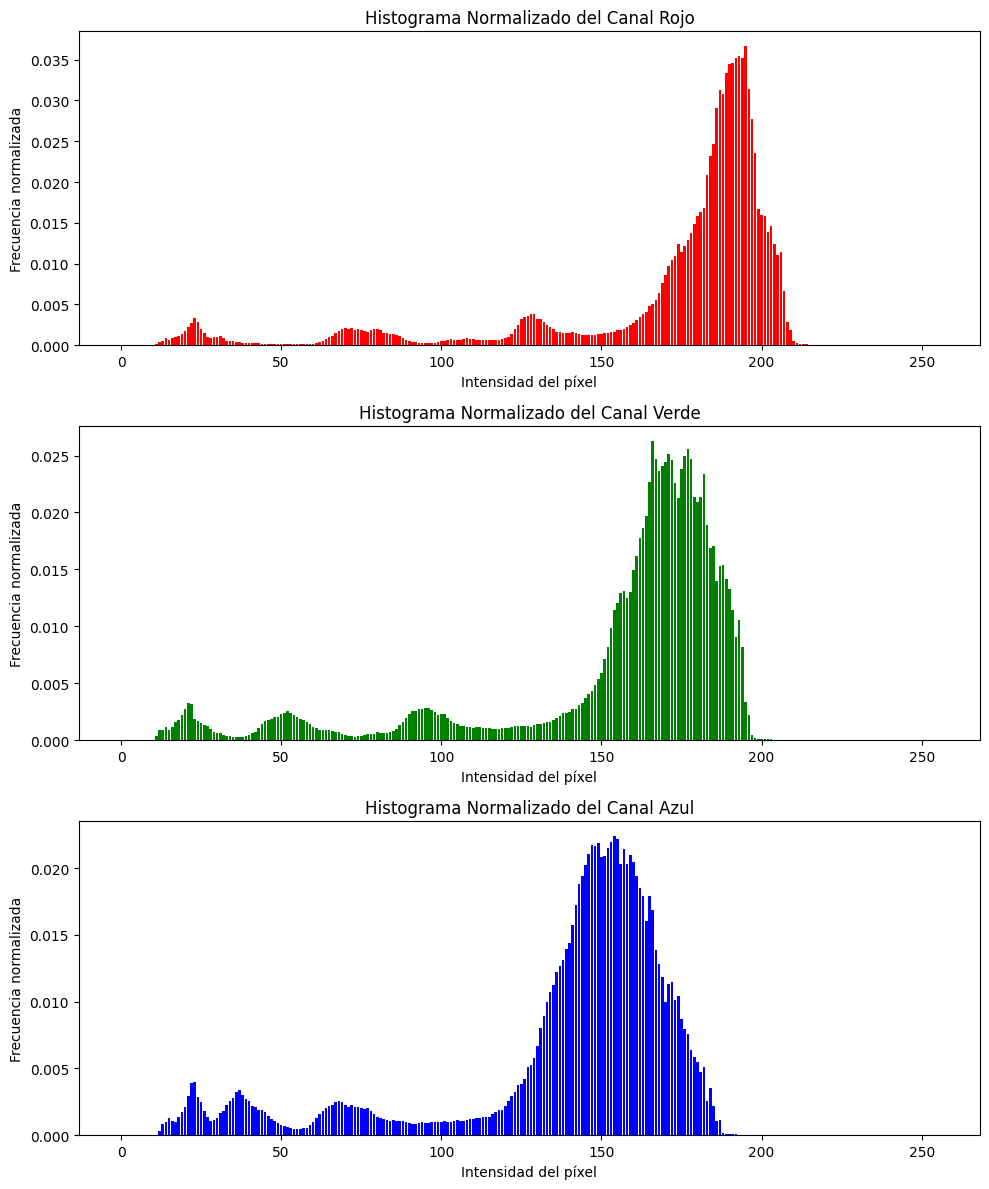

In [63]:
arena_hist_r_normalized_np, arena_hist_g_normalized_np, arena_hist_b_normalized_np = get_normalized_histograms_from_image("arena.jpg")

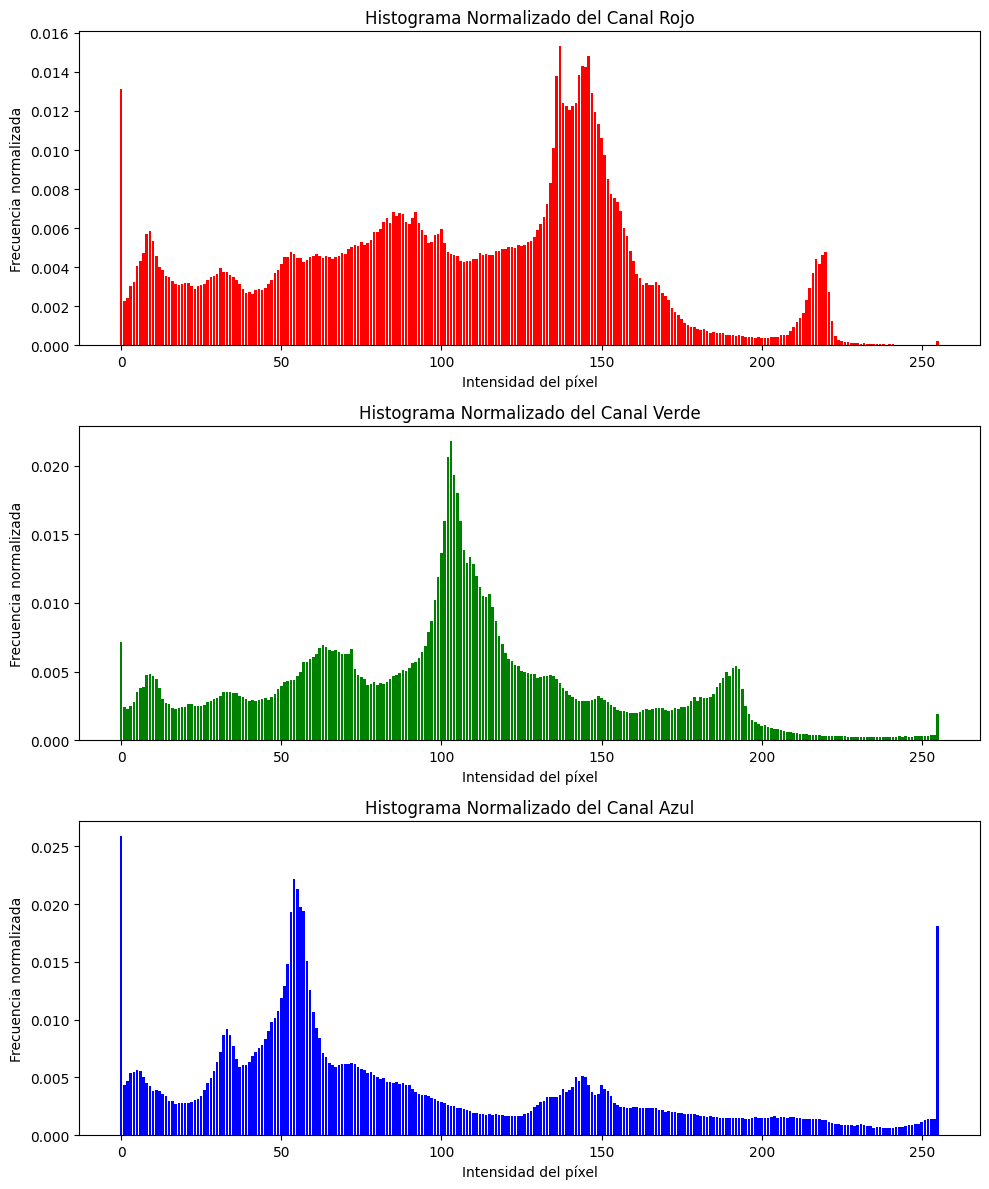

In [64]:
partido_hist_r_normalized_np, partido_hist_g_normalized_np, partido_hist_b_normalized_np = get_normalized_histograms_from_image("partido.jpg")

### Distancias con fotos distintas

In [65]:
red_distance_vaso_arena = EuclideanDistance(arena_hist_r_normalized_np, claro_hist_r_normalized_np)
green_distance_vaso_arena = EuclideanDistance(arena_hist_g_normalized_np, claro_hist_g_normalized_np)
blue_distance_vaso_arena = EuclideanDistance(arena_hist_b_normalized_np, claro_hist_b_normalized_np)

mean_distance_vaso_arena = (red_distance_vaso_arena + green_distance_vaso_arena + blue_distance_vaso_arena) / 3

print("Distancia Euclidiana entre las imágenes de vaso claro y reloj de arena: ", mean_distance_vaso_arena)

Distancia Euclidiana entre las imágenes de vaso claro y reloj de arena:  0.10051810229945402


In [66]:
red_distance_vaso_partido = EuclideanDistance(partido_hist_r_normalized_np, claro_hist_r_normalized_np)
green_distance_vaso_partido = EuclideanDistance(partido_hist_g_normalized_np, claro_hist_g_normalized_np)
blue_distance_vaso_partido = EuclideanDistance(partido_hist_b_normalized_np, claro_hist_b_normalized_np)

mean_distance_vaso_partido = (red_distance_vaso_partido + green_distance_vaso_partido + blue_distance_vaso_partido) / 3

print("Distancia Euclidiana entre las imágenes de vaso claro y partido: ", mean_distance_vaso_partido)

Distancia Euclidiana entre las imágenes de vaso claro y partido:  0.0600143479596248


Se puede observar que al comparar las imágenes de los vasos con distintas iluminacions, se obtiene un valor bajo en la métrica propuesta. Cuando una de las imágenes del vaso se compara con una imágen de reloj de arena, se obtiene un valor ligeramente más alto. Sin embargo, es interesante que, cuando se compara el vaso con una fotografía de una televisión, la métrica sale más baja, que al comparar las dos imágenes iguales del vaso. Esto indica, que la métrica de distancia euclideana, no es una muy buena métrica para comparar imágenes en RGB. Esto se puede deber a que las dos imágenes tienen colores similares y la cantidad de pixeles en cada color es similar. Sería recomendable usar una métrica que tome en cuenta también la posición de pixeles en la imagen.

### 2.4 Convertir de RGB a HSV


In [67]:
def Convert_RGB_HSV(imagen_rgb):
    return imagen_rgb.convert('HSV')

In [68]:
def resize_image(imagen, width, height):
    return imagen.resize((width, height))

In [69]:
vaso_claro_hsv = Convert_RGB_HSV(Image.open(vaso_claro_path))
vaso_oscuro_hsv = Convert_RGB_HSV(Image.open(vaso_oscuro_path))

width, height = vaso_claro_hsv.size

arena_hsv = Convert_RGB_HSV(Image.open("arena.jpg"))
arena_hsv = resize_image(arena_hsv, width, height)

partido_hsv = Convert_RGB_HSV(Image.open("partido.jpg"))
partido_hsv = resize_image(partido_hsv, width, height)

La conversión de una imagen de RGB a HSV proporciona información valiosa sobre sus propiedades cromáticas. Mientras que el espacio de color RGB combina rojo, verde y azul, el espacio HSV separa el matiz, la saturación y el valor, facilitando la comprensión y manipulación intuitiva de los colores. El matiz refleja el tono, la saturación mide la pureza y el valor indica la luminosidad. Esta representación simplifica el análisis cromático, siendo útil en tareas como procesamiento de imágenes y ajuste de colores.

### 2.5 Construir histogramas HSV

In [70]:
def HSV_HIStogram(imagen_hsv):
    
    array_hsv = np.array(imagen_hsv)
    
    h_values = array_hsv[:, :, 0].ravel()
    s_values = array_hsv[:, :, 1].ravel()

    # Crear histogramas para H y S
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(h_values, bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histograma de H (Hue)')
    plt.xlabel('Valor de H')
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    plt.hist(s_values, bins=256, range=(0, 256), color='green', alpha=0.7)
    plt.title('Histograma de S (Saturation)')
    plt.xlabel('Valor de S')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()
    
    return h_values, s_values

####  Histograma HSV de la imagen vaso claro

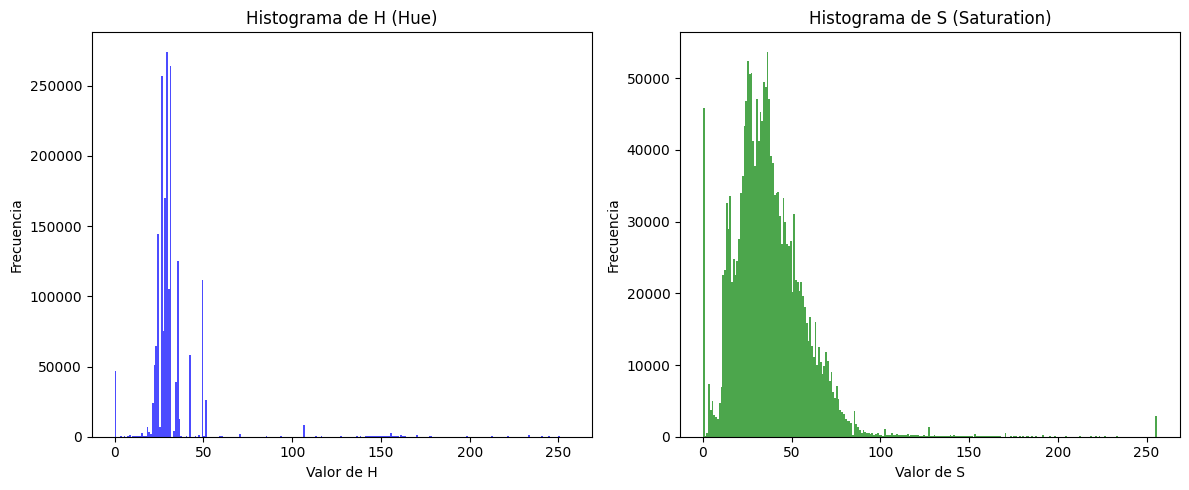

In [71]:
h_values_vaso_claro, s_values_vaso_claro = HSV_HIStogram(vaso_claro_hsv)

#### Histograma HSV de la imagen vaso oscuro

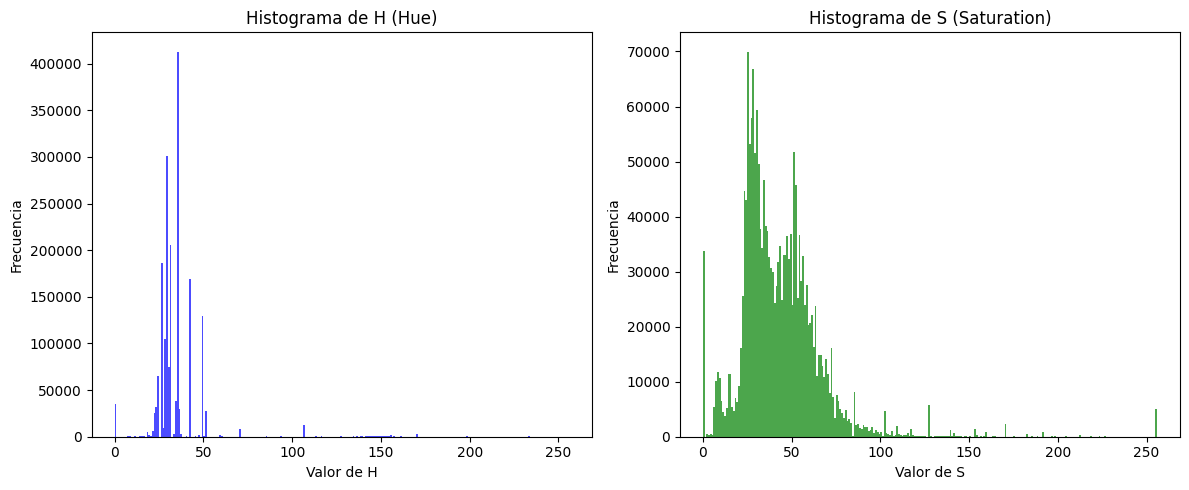

In [72]:
h_values_vaso_oscuro, s_values_vaso_oscuro = HSV_HIStogram(vaso_oscuro_hsv)


#### Histograma HSV de la imagen reloj de arena

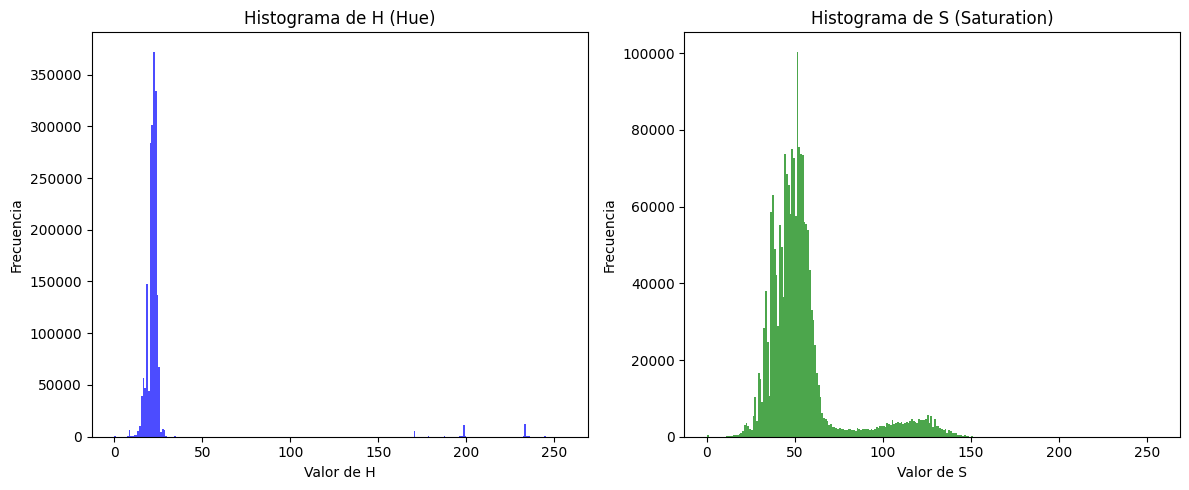

In [73]:
h_values_arena, s_values_arena = HSV_HIStogram(arena_hsv)

#### Histograma HSV de la imagen partido


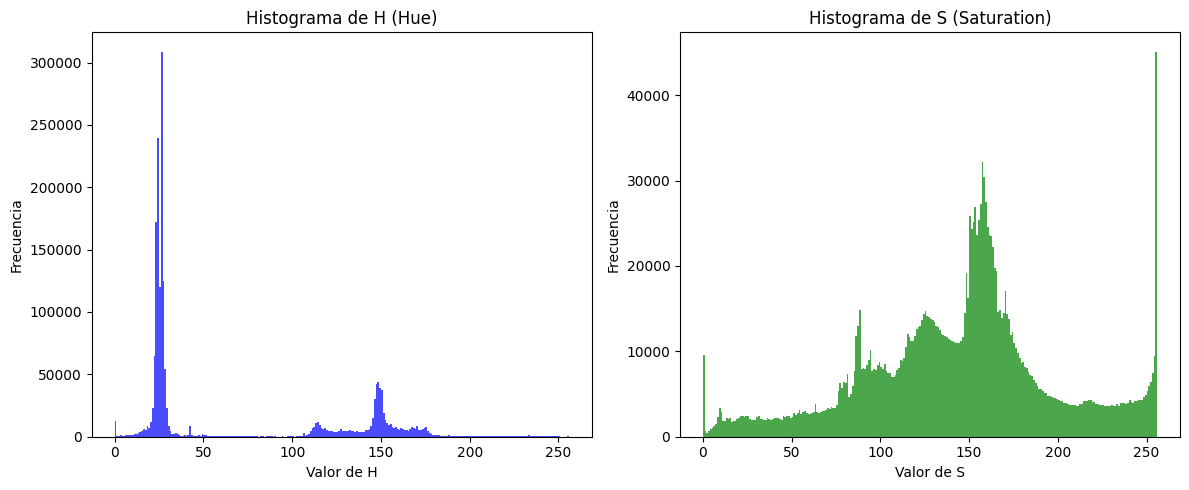

In [74]:
h_values_partido, s_values_partido = HSV_HIStogram(partido_hsv)

### Comparación de distancias con HSV

In [75]:
h_distance_vasos = EuclideanDistance(h_values_vaso_claro, h_values_vaso_oscuro)
s_distance_vasos = EuclideanDistance(s_values_vaso_claro, s_values_vaso_oscuro)

mean_distance_vasos_hsv = (h_distance_vasos + s_distance_vasos) / 2

print("Distancia Euclidiana entre las imágenes del vaso en HSV: ", mean_distance_vasos_hsv)

Distancia Euclidiana entre las imágenes del vaso en HSV:  253374.61170028913


In [76]:
h_distance_vaso_arena = EuclideanDistance(h_values_vaso_claro, h_values_arena)
s_distance_vaso_arena = EuclideanDistance(s_values_vaso_claro, s_values_arena)

mean_distance_vaso_arena_hsv = (h_distance_vaso_arena + s_distance_vaso_arena) / 2

print("Distancia Euclidiana entre las imágenes del vaso claro y reloj de arena en HSV: ", mean_distance_vaso_arena_hsv)

Distancia Euclidiana entre las imágenes del vaso claro y reloj de arena en HSV:  183730.9890289862


In [77]:
h_distance_vaso_partido = EuclideanDistance(h_values_vaso_claro, h_values_partido)
s_distance_vaso_partido = EuclideanDistance(s_values_vaso_claro, s_values_partido)

mean_distance_vaso_partido_hsv = (h_distance_vaso_partido + s_distance_vaso_partido) / 2

print("Distancia Euclidiana entre las imágenes del vaso claro y partido en HSV: ", mean_distance_vaso_partido_hsv)

Distancia Euclidiana entre las imágenes del vaso claro y partido en HSV:  187914.97372106422


Lo mismo que sucedió en las imágenes RGB, sucede en las imágenes HSV. La distancia entre vasos es mayor, que la distancia entre vaso y reloj, y vaso y televisión. Es interesante, porque los histogramas de ambos vasos se ven muy similares. Por otra parte, los histogramas, especialmente en la saturación, de los vasos en comparación de las otras imágenes son muy distintos. Sin embargo, algo que pude estar afectando, es la distribución de los datos. Por ejemplo, la distribución un poco más uniforme de la imágen del partido, puede causar una reducción en la distancia. Además, las frecuencias del vaso oscuro, en algunos valores, llegan arriba de 7000, mientras que en el vaso claro solo llegan un poco arriba de 5000, lo que igualmente pueden causar diferencias más grandes en distancias. En general, tampoco parece ser una buena métrica para comparar similitud de imágenes HSV, y seguramente se deben tomar en cuenta las posiciones de los pixeles.

## Ejercicio 3

In [78]:
def open_image(path):
    return np.array(Image.open(path))

In [79]:
def get_gray_scale_image(image):
    image = open_image(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [80]:
def equalize_histogram(image):
    if isinstance(image, str):
        image = np.array(Image.open(image))
    else:
        image = image
        
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    num_pixels = np.prod(image.shape[:2])
    normalized_histogram = normalize_histogram(histogram, num_pixels)
    
    cumulative_histogram = np.cumsum(normalized_histogram)

    equalized_histogram = np.round(cumulative_histogram * 255).astype(np.uint8)

    equalized_image = equalized_histogram[image]

    return equalized_histogram, normalized_histogram, image

In [81]:
def get_equalized_image(image):
    equalized_histogram, _, _ = equalize_histogram(image)
    equalized_image = equalized_histogram[image]
    
    return equalized_image

### Algoritmo propio

In [82]:
image_path = "grayscale.jpg"
image_to_equalize = get_gray_scale_image(image_path)
equalized_image = get_equalized_image(image_to_equalize)
image_histogram, _ = np.histogram(image_to_equalize.flatten(), bins=256, range=[0, 256])
normalized_original_histogram = normalize_histogram(image_histogram, np.prod(image_to_equalize.shape[:2]))
equalized_image_histogram, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])
normalized_equalized_image_histogram = normalize_histogram(equalized_image_histogram, np.prod(equalized_image.shape[:2]))

cumulative_distribution_original = np.cumsum(normalized_original_histogram)
cumulative_distribution_equalized = np.cumsum(normalized_equalized_image_histogram)

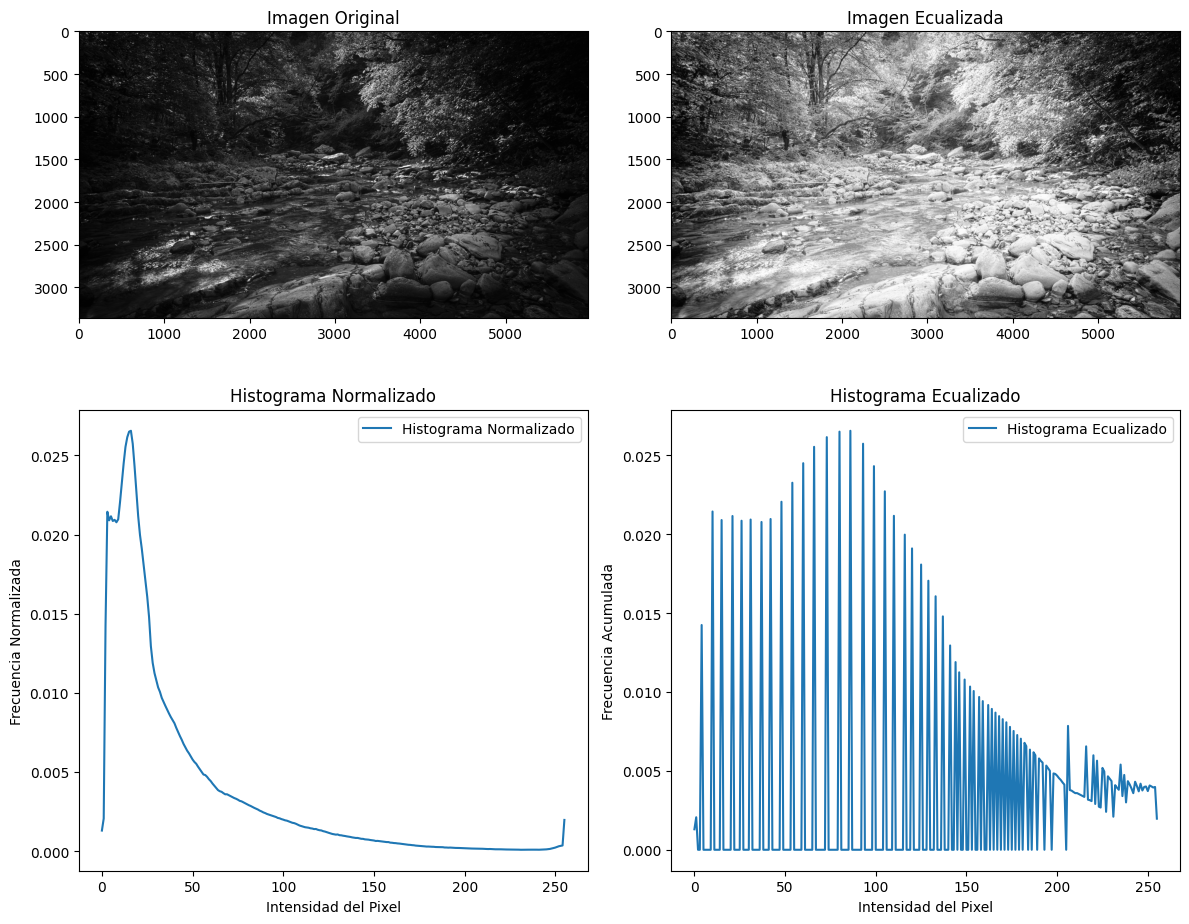

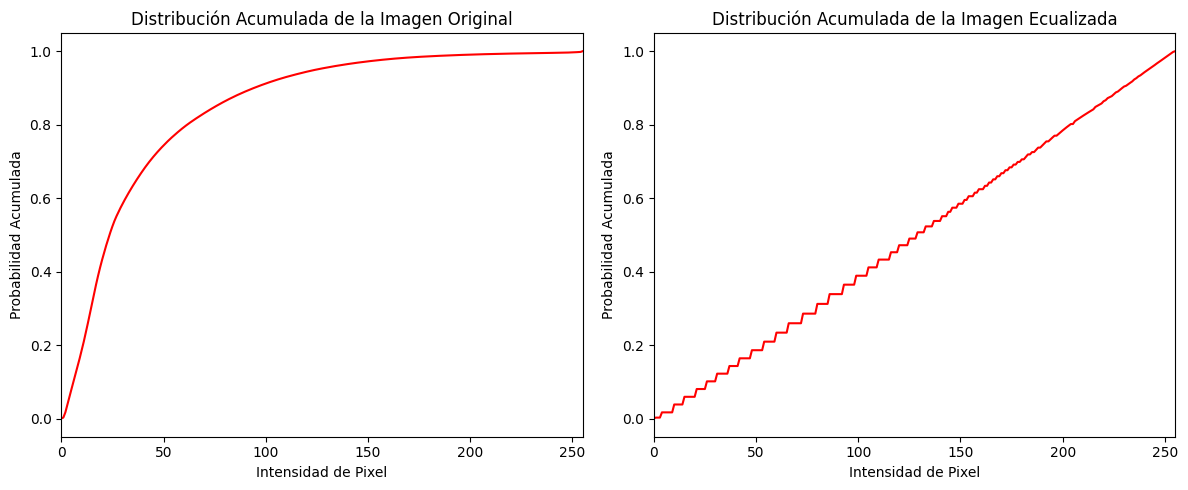

In [83]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_to_equalize, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Imagen Ecualizada')

plt.subplot(2, 2, 3)
plt.plot(normalized_original_histogram, label='Histograma Normalizado')
plt.title('Histograma Normalizado')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia Normalizada')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(normalized_equalized_image_histogram, label='Histograma Ecualizado')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad del Pixel')
plt.ylabel('Frecuencia Acumulada')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cumulative_distribution_original, color='red')
plt.title("Distribución Acumulada de la Imagen Original")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Probabilidad Acumulada")
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.plot(cumulative_distribution_equalized, color='red')
plt.title("Distribución Acumulada de la Imagen Ecualizada")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Probabilidad Acumulada")
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

### Open CV

In [84]:
equalized_image_cv = cv2.equalizeHist(image_to_equalize)
histogram_equalized_cv = cv2.calcHist([equalized_image_cv], [0], None, [256], [0, 256])
normalized_equalized_histogram_cv = histogram_equalized_cv / np.prod(equalized_image.shape[:2])

cumulative_distribution = np.cumsum(normalized_equalized_histogram_cv)

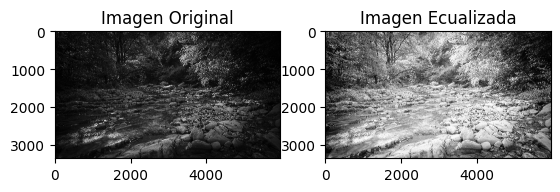

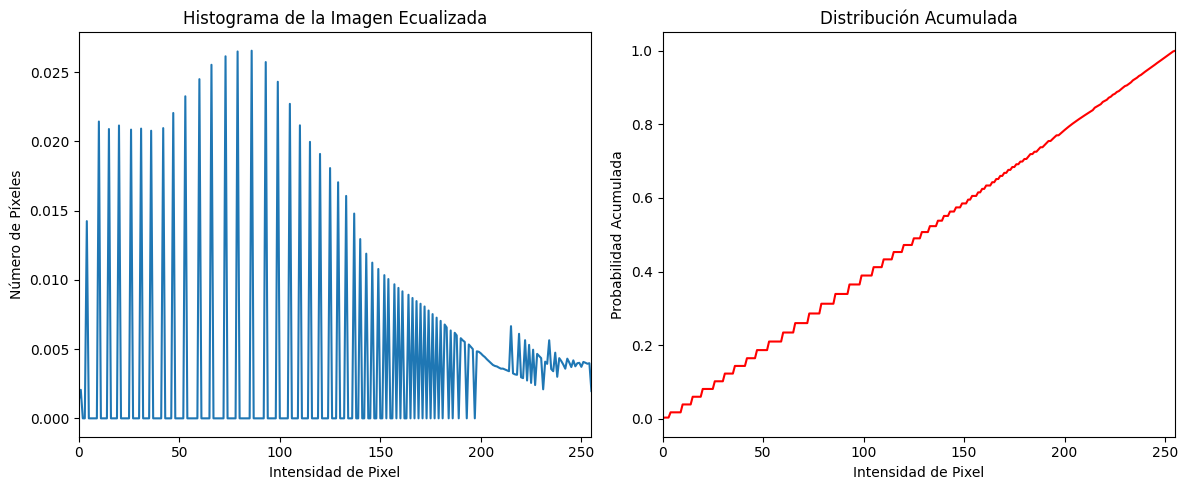

In [85]:
plt.subplot(2, 2, 1)
plt.imshow(image_to_equalize, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image_cv, cmap='gray')
plt.title('Imagen Ecualizada')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Histograma de la Imagen Ecualizada")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Número de Píxeles")
plt.plot(normalized_equalized_histogram_cv)
plt.xlim([0, 255])

plt.subplot(1, 2, 2)
plt.title("Distribución Acumulada")
plt.xlabel("Intensidad de Pixel")
plt.ylabel("Probabilidad Acumulada")
plt.plot(cumulative_distribution, color='red')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

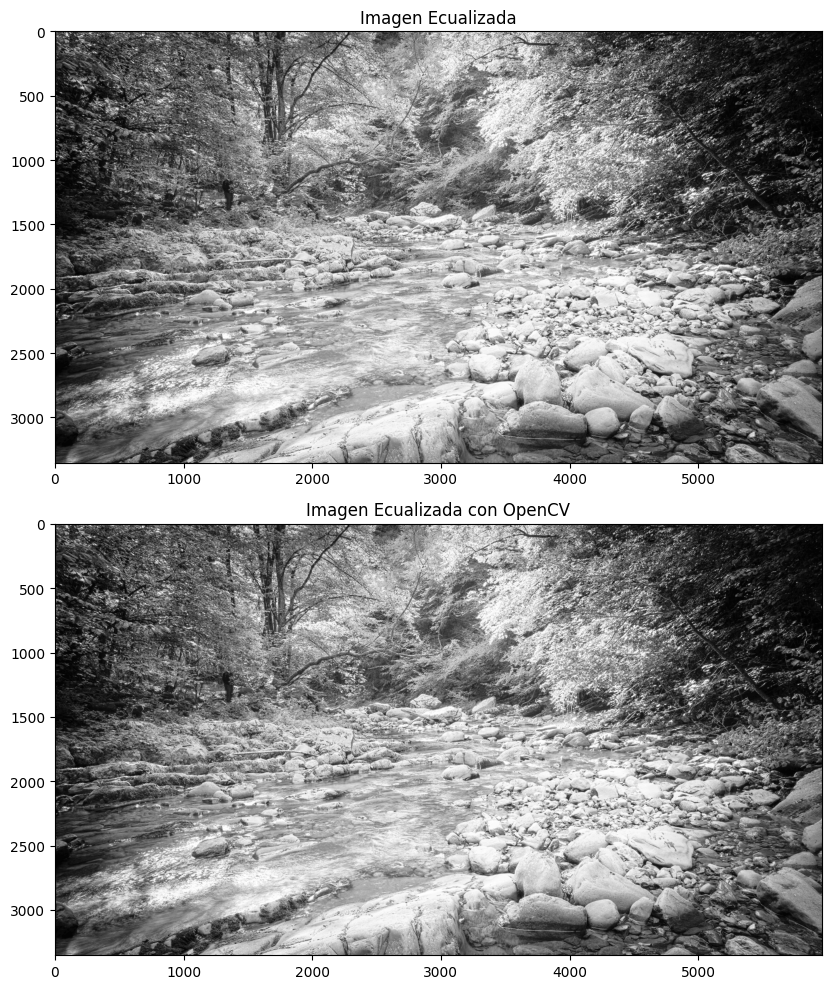

In [86]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Imagen Ecualizada')

plt.subplot(2, 1, 2)
plt.imshow(equalized_image_cv, cmap='gray')
plt.title('Imagen Ecualizada con OpenCV')

plt.tight_layout()
plt.show()

In [87]:
distance_equalized_histograms = EuclideanDistance(np.array(normalized_equalized_image_histogram), np.array(normalized_equalized_histogram_cv))
print("Distancia Euclidiana entre los histogramas de la imagen original y la ecualizada: ", distance_equalized_histograms)

Distancia Euclidiana entre los histogramas de la imagen original y la ecualizada:  2.3511494995596327


Al observar la distancia euclideana entre los histogramas normalizados de las imágenes, se puede observar una ligera diferencia entre ambos, debido a que el score es de 2.35. Sin embargo, al comparar las imagenes visualmente, se observa que son muy similares, aunque en OpenCV se observa algunas áreas más oscuras que en la imagen equalizada por el algoritmo propio. Este error se puede deber a diferencias entre ambos algoritmos, como cuestiones de redondeo o de la forma en que se calcula el histograma.

## Ejercicio 4

### Implementación de 3 algoritmos de segmentación binaria

In [88]:
image_path = "mickey.jpg"
image = get_gray_scale_image(image_path)
ruta_guardar = 'mickey_gris.jpg'
cv2.imwrite(ruta_guardar, image)


True

#### Adaptative thresholding

In [89]:
def mostrar_rango(imagen_gris):
    valor_minimo = np.min(imagen_gris)
    valor_maximo = np.max(imagen_gris)
    
    plt.imshow(imagen_gris, cmap='gray')
    plt.title('Imagen en Escala de Grises')
    cbar = plt.colorbar(ticks=[valor_minimo, valor_maximo], orientation='vertical')
    cbar.set_label('Niveles de Gris', rotation=270, labelpad=15)
    plt.show()


In [90]:
def adaptative_thresholding(threshold, image, threshold_delta=10, max_iterations=100):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    for i in range(max_iterations):

        # Binariza la imagen usando el umbral actual
        binary_image = (image > threshold).astype(np.uint8) * 255

        # Encuentra los píxeles de fondo y primer plano
        foreground_pixels = image[binary_image == 255]
        background_pixels = image[binary_image == 0]

        # Verifica si hay píxeles de fondo y primer plano
        if len(foreground_pixels) == 0 or len(background_pixels) == 0:
            break

        # Calcula el nuevo umbral como el promedio de los píxeles de fondo y primer plano
        new_threshold = 0.5 * (np.mean(background_pixels) + np.mean(foreground_pixels))

        # Verifica si el cambio en el umbral es menor que el umbral de delta
        if np.abs(new_threshold - threshold) < threshold_delta:
            break

        threshold = new_threshold

    return binary_image, threshold


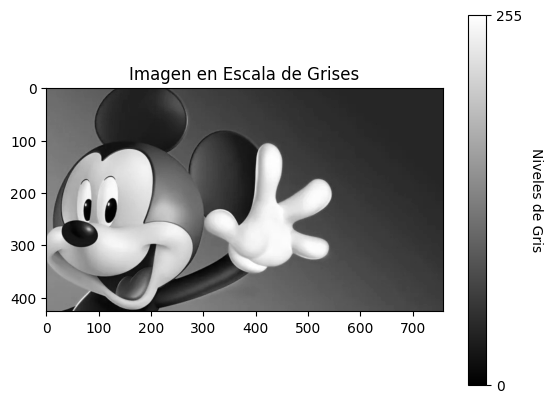

In [91]:
# Lee la imagen

image_path = 'mickey_gris.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

mostrar_rango(image)



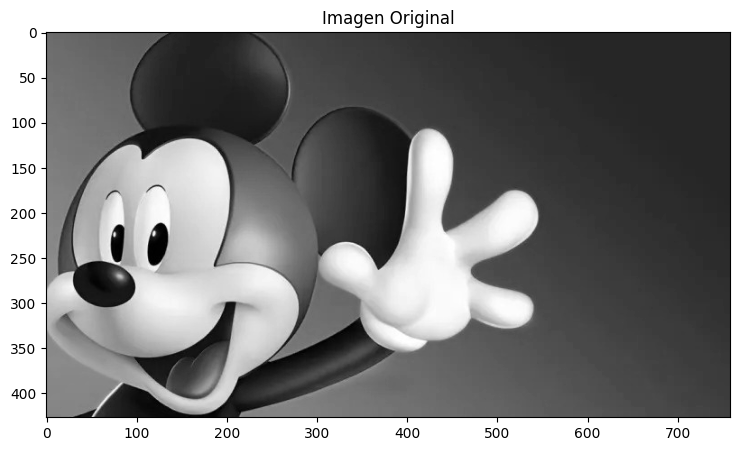

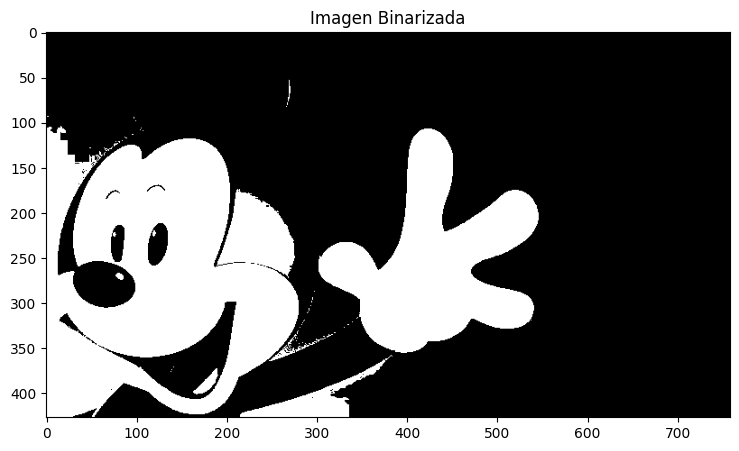

In [92]:
# Aplica la binarización adaptativa iterativa
block_size = 15
threshold = int(input('Ingresa el umbral inicial: '))
binary_image, threshold = adaptative_thresholding(threshold, image)

# Muestra la imagen original y la binarizada
plt.figure(figsize=(12, 5))
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.show()

plt.figure(figsize=(12, 5))
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binarizada')
plt.show()


Como podemos ver en la imagen, el algoritmo de thresholding adaptativo, es capaz de separar el fondo de la imagen, de la mano. Sin embargo, no es capaz de separar correctamente las orejas del fondo. Este algoritmo tuvo problemas ya que el fondo tiene una disminución de luz porque lo que un metodo general no obtendra los resultados optimo. Por otro lado utilizar un metodo adaptativo de forma local, nos permite obtener mejores resultados.Esto lo verificaremos más adelante

#### Segmentación local

In [93]:
def otsu_thresholding(grayscale_image):
    # Calcular el histograma
    pixel_counts, bin_edges = np.histogram(grayscale_image, bins=256, range=(0, 256))

    # Normalizar el histograma
    total_pixels = grayscale_image.size
    normalized_histogram = pixel_counts / total_pixels

    # Calcular la suma acumulada y la suma de los valores acumulados
    cumulative_sum = np.cumsum(normalized_histogram)
    cumulative_mean = np.cumsum(normalized_histogram * np.arange(256))

    # Calcula la media global
    global_mean = cumulative_mean[-1]

    # Inicializa variables para el umbral óptimo y la máxima varianza entre clases
    optimal_threshold = 0
    max_between_class_variance = 0

    for t in range(256):
        probability_class_1 = cumulative_sum[t]
        probability_class_2 = 1 - probability_class_1

        if probability_class_1 == 0 or probability_class_2 == 0:
            continue

        mean_class_1 = cumulative_mean[t] / probability_class_1
        mean_class_2 = (global_mean - cumulative_mean[t]) / probability_class_2

        # Calcula la varianza entre clases
        between_class_variance = probability_class_1 * probability_class_2 * (mean_class_1 - mean_class_2) ** 2

        # Actualiza el umbral si se encuentra una varianza mayor
        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            optimal_threshold = t

    # Aplica el umbral a la imagen
    _, binarized_image = cv2.threshold(grayscale_image, optimal_threshold, 255, cv2.THRESH_BINARY)

    return binarized_image, optimal_threshold

In [94]:
def get_window(grayscale_image, pixel, window_size):
    rows, cols = grayscale_image.shape
    side_size = window_size // 2

    x, y = pixel

    # Crear una ventana vacía
    window = np.zeros((window_size, window_size), dtype=grayscale_image.dtype)

    for i in range(-side_size, side_size):
        for j in range(-side_size, side_size):
            # Calcula la posición en la imagen original
            orig_x = x + i
            orig_y = y + j

            # Verifica si está dentro de los límites de la imagen
            if 0 <= orig_x < rows and 0 <= orig_y < cols:
                # Usa el píxel de la imagen original
                window[i + side_size, j + side_size] = grayscale_image[orig_x, orig_y]
            else:
                # Refleja el píxel si está fuera de los límites
                ref_x = min(max(orig_x, 0), rows - 1)
                ref_y = min(max(orig_y, 0), cols - 1)
                window[i + side_size, j + side_size] = grayscale_image[ref_x, ref_y]

    return window

In [258]:
def local_segmentation(grayscale_image, window_size=3):
    for i in range(grayscale_image.shape[0]):
        for j in range(grayscale_image.shape[1]):
            window = get_window(grayscale_image, (i, j), window_size)
            _, threshold = otsu_thresholding(window)
            grayscale_image[i, j] = 255 if grayscale_image[i, j] > threshold else 0

    return grayscale_image

In [265]:
image_path = 'mickey_gris.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [266]:
new_img = local_segmentation(image, window_size=5)

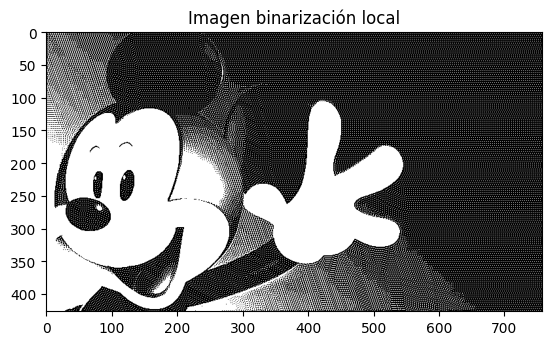

In [267]:
plt.imshow(new_img, cmap='gray')
plt.title('Imagen binarización local')
plt.show()

Cuando se hace una binarización local, con una ventana bastante fina, se observa que se llega a una segmentación bastante granular y buena. Mucho mejor, que en las binarizaciones globales.

### Implementacion Naive


In [98]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [99]:
def binarize_naive(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    rows, cols = image_src.shape
    image_b = [[0] * cols for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            pixel_value = image_src[i, j] if gray_scale else image_src[i, j][0]
            image_b[i][j] = 255 if pixel_value > thresh_val else 0

    image_b = np.array(image_b, dtype=np.uint8)

    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        ax1.axis("off")
        ax1.set_title('Original')
        ax1.imshow(image_src, cmap=cmap_val)

        ax2.axis("off")
        ax2.set_title("Binarized")
        ax2.imshow(image_b, cmap=cmap_val)

        plt.show()
        return True

    return image_b


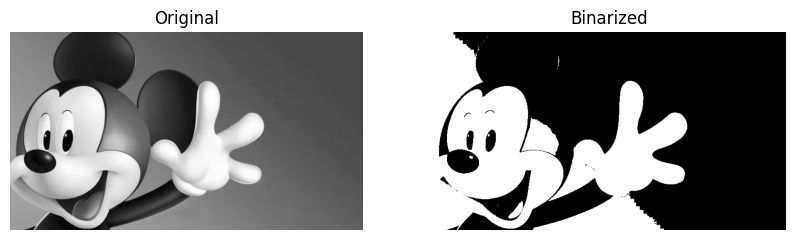

True

In [100]:
binarize_naive(image_file='mickey.jpg', with_plot=True, gray_scale=True)

## Ejercicio 5

## Ejercicio 6

### Saigon

In [211]:
saigon = cv2.imread('saigon.jpeg')

In [239]:
def gamma_correction(channel, gamma):
    normalized = channel.astype(float) / 255.0
    corrected = np.copy(normalized)
    corrected = np.power(normalized, gamma)

    corrected = np.uint8(corrected * 255)
    
    return corrected

In [237]:
saigon_HSV = cv2.cvtColor(saigon, cv2.COLOR_BGR2HSV)
saigon_V = saigon_HSV[:, :, 2]
saigon_V_corrected = gamma_correction(saigon_V, 0.555)
# 0.454545
saigon_HSV[:, :, 2] = saigon_V_corrected
saigon_corrected = cv2.cvtColor(saigon_HSV, cv2.COLOR_HSV2BGR)
saigon_corrected = cv2.cvtColor(saigon_corrected, cv2.COLOR_BGR2RGB)

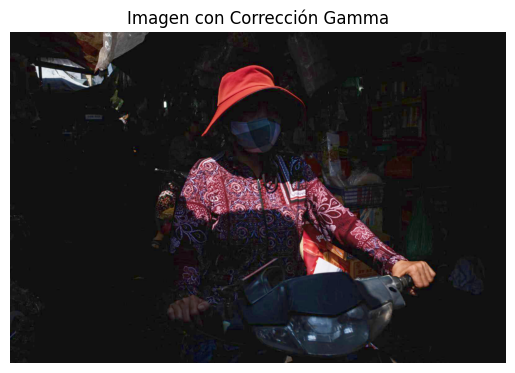

In [213]:
plt.imshow(saigon_corrected)
plt.title('Imagen con Corrección Gamma')
plt.axis('off')
plt.show()

In [214]:
saigon_corrected
cv2.imwrite('saigon_corrected.jpg', saigon_corrected)

True

In [219]:
# Abre la imagen
img = Image.open("saigon.jpeg")

# Ajusta la corrección gamma (1.0 es sin cambios)
gamma_corrected = ImageEnhance.Brightness(img).enhance(2.2)

# Guarda la imagen resultante
gamma_corrected.save("output.jpg")


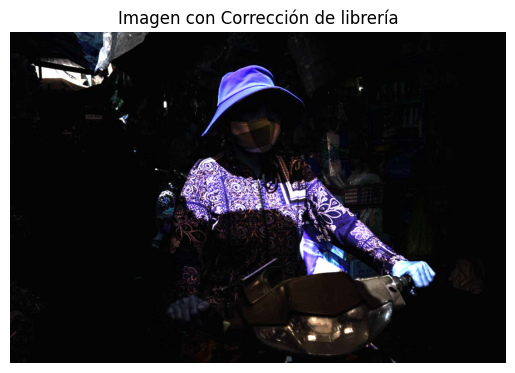

In [263]:
corrected = cv2.imread('output.jpg')
plt.imshow(corrected)
plt.title('Imagen con Corrección de librería')
plt.axis('off')
plt.show()

Se puede observar que al realizar la correción gamma de la imágen, se obtienen buenos resultados, al poder observar con mayor claridad la cara de la mujer y ciertos elementos del fondo. Al compararla con la imagen obtenida por medio de una librería, se observa que la implementación manual puede ser un poco mejor, ya que se observa un poco más de detalle en la imagen.

### Monkey

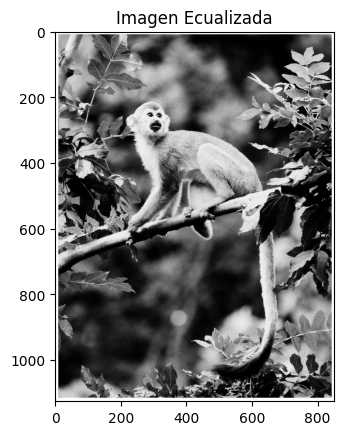

In [244]:
monkey = cv2.imread('monkey.jpeg')
monkey = monkey[:, :, 1]

result_image = get_equalized_image(monkey)
result_image = gamma_correction(result_image, 1.6)

plt.imshow(result_image, cmap='gray')
plt.title('Imagen Ecualizada')
plt.show()


### Rice

In [250]:
rice = cv2.imread('rice.jpg')
rice = rice[:, :, 0]
rice.shape

(850, 850)

In [255]:
result_image =local_segmentation(rice, window_size=15)

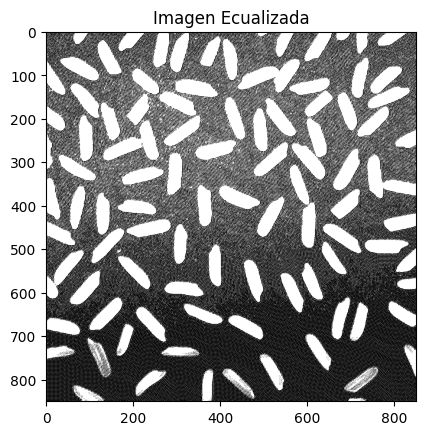

In [257]:
plt.imshow(result_image, cmap='gray')
plt.title('Imagen Ecualizada')
plt.show()

Para la imagen de arroz, se puede observar que el algoritmo de thresholding adaptativo aplicado de forma local, es capaz de separar el fondo de la imagen, de los granos de arroz. Sin embargo, podemos ver unos pequeños puntitos blancos en la parte superior de la imagen. De la impresión de que el fondo tiene textura como si estuvieran sobre algún tipo de tela. En este caso lo que sucede es que al aplicar la ventana estos puntitos en la imagen son de color blanco y si la ventada contenia un puntito y el arroz, al ser tan cercanos en color los clasficaría como la misma clase.